# Importation des bibliothéques

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# 1. Chargement des données

## 1.2. Données APEC

In [4]:
df = pd.read_csv('Scrapped_Data/Data_APEC_all/all_data_V1_cleaned.csv')
df

,entreprise,type_contrat,date_publication,date_mise_a_jour,salaire,prise_de_poste,experience,metier,statut_du_poste,zone_de_deplacement,...,profil_recherche,langues,savoir_etre,savoir_faire,descriptif_entreprise,nombre_posts,duree,ville,code_postal,departement
0,MICHAEL PAGE INTERNATIONAL FRANCE,CDI,2024-02-29,2024-02-29,40.0,Dès que possible,0,Développeur,Cadre du secteur privé,Pas de déplacement,...,"De formation supérieure en informatique, vous ...",Aucune langue attendue,"['Autonomie', ""Capacité d'analyse"", 'Capacité ...","['Application Web', 'Développement web', 'Info...",Notre client est un éditeur de logiciels dans ...,1,NaN,Aix-en-Provence,13,Bouches-du-Rhône
1,Charlotte Drahy sas,CDI,2024-01-17,2024-03-15,40.0,Dès que possible,5,Développeur,Cadre du secteur privé,Nationale,...,Les compétences requises sont :\nProgrammation...,"Anglais, Français","[""Esprit d'équipe"", 'Motivation', 'Rigueur']","['Analyse des besoins', 'Analyse fonctionnelle...","""Charlotte Drahy sas"" est une société de conse...",1,NaN,Aubagne,13,Bouches-du-Rhône
2,LOEMA,CDI,2024-02-22,2024-02-22,47.5,Dès que possible,4,Développeur,Cadre du secteur privé,Pas de déplacement,...,Vous avez une expérience en : \n- Programma...,Aucune langue attendue,"['Curiosité', 'Goût du challenge']","['ASP.NET', 'Bootstrap Protocol', 'C sharp', '...",Situé au cœur même de la ville de Marseille no...,1,NaN,Marseille,13,Bouches-du-Rhône
3,CELAD,CDI,2024-02-29,2024-02-29,36.0,Dès que possible,1,Développeur,Cadre du secteur privé,Pas de déplacement,...,"Idéalement ingénieur de formation, vous justif...",Aucune langue attendue,"['Autonomie', 'Force de proposition', 'Qualité...","['Framework', 'JavaScript', 'ReactJS', 'TypeSc...","Issu du monde bancaire, #CELAD a été créée en ...",1,NaN,Aix-en-Provence,13,Bouches-du-Rhône
4,EASY PARTNER,CDI,2024-03-01,2024-03-01,40.0,Dès que possible,3,Développeur,Cadre du secteur privé,Pas de déplacement,...,Profil recherché\nNous recherchons un profil a...,Aucune langue attendue,"['Ambition', 'Autonomie', 'Bienveillance', 'Ca...","['Nuxt', 'Vue.js', 'Développement web', 'React...",Easy Partner est un Cabinet de recrutement dig...,1,NaN,Aix-en-Provence,13,Bouches-du-Rhône
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8037,Seyos,CDI,2024-03-15,2024-03-15,52.5,Dès que possible,5,Business developer,Cadre du secteur privé,Pas de déplacement,...,Profil recherché :\nVous avez une expérience s...,Aucune langue attendue,"['Force de proposition', 'Proactivité']","['Manutention', 'Automatisme', 'Cahier des cha...",Seyos est un cabinet de recrutement spécialisé...,1,NaN,Tonneins,47,Lot-et-Garonne
8038,LES COLETTES,CDI,2024-03-12,2024-03-12,NaN,Dès que possible,2,Ingénieur test et recettes,Cadre du secteur privé,Pas de déplacement,...,"Issu(e) d'une formation en informatique, idéal...",Aucune langue attendue,"[""Esprit d'équipe""]","['Cloud', 'Jira', 'SAAS', 'Algorithme', 'Autom...",Editeur de logiciels français multi-sectoriel ...,1,NaN,Villeneuve-sur-Lot,47,Lot-et-Garonne
8039,Armée de l'Air et de l'Espace,CDD,2024-02-21,2024-02-21,34.0,Dès que possible,0,Consultant en cybersécurité,Cadre du secteur public / Armées,Nationale,...,"Jeune diplômé, avec ou sans expérience profess...",Anglais,"[""Capacité d'adaptation"", 'Capacité de communi...","['Analyse des risques', 'Gestion de projet', '...",L’armée de l’Air et de l’Espace a pour mission...,1,de 5 mois,Saint-Dizier,52,Haute-Marne
8040,Armée de l'Air et de l'Espace,CDD,2024-02-16,2024-02-16,22.5,Dès que possible,0,Responsable sécurité informatique,Cadre du secteur public / Armées,Nationale,...,"Diplômé, avec ou sans expérience professionnel...",Anglais,"[""Capacité d'adaptation"", 'Capacité de communi...","['Analyse des risques', 'Gestion de projet', '...",L’armée de l’Air et de l’Espace a pour mission...,1,de 5 mois,Saint-Dizier,52,Haute-Marne


In [5]:
df.shape

(8042, 23)

In [6]:
df.dtypes

entreprise                object
type_contrat              object
date_publication          object
date_mise_a_jour          object
salaire                  float64
prise_de_poste            object
experience                 int64
metier                    object
statut_du_poste           object
zone_de_deplacement       object
secteur_d_activite        object
Teletravail               object
descriptif_poste          object
profil_recherche          object
langues                   object
savoir_etre               object
savoir_faire              object
descriptif_entreprise     object
nombre_posts               int64
duree                     object
ville                     object
code_postal               object
departement               object
dtype: object

In [7]:
df.isna().sum()

entreprise                  0
type_contrat                0
date_publication            0
date_mise_a_jour            0
salaire                  3831
prise_de_poste              0
experience                  0
metier                      0
statut_du_poste             0
zone_de_deplacement         0
secteur_d_activite          0
Teletravail              4376
descriptif_poste            0
profil_recherche            0
langues                     0
savoir_etre                 0
savoir_faire                0
descriptif_entreprise       0
nombre_posts                0
duree                    7579
ville                       0
code_postal                 0
departement                 0
dtype: int64

### Remplacer les valeurs NaN de l'attribut "salaire" avec la moyenne correspondante pour chaque département

In [8]:
moyenne_salaire_par_departement = df.groupby("departement")["salaire"].mean().reset_index()
moyenne_salaire_par_departement.isna().sum()

departement    0
salaire        7
dtype: int64

### Remplacer les valeurs NaN par la moyenne générale des salaires

In [9]:
moyenne_generale_salaire = df["salaire"].mean()
moyenne_salaire_par_departement["salaire"].fillna(moyenne_generale_salaire, inplace=True)
moyenne_salaire_par_departement


,departement,salaire
0,Ain,44.107143
1,Aisne,41.333333
2,Allier,38.833333
3,Alpes-Maritimes,43.045455
4,Alpes-de-Haute-Provence,46.206720
...,...,...
90,Vendée,42.477273
91,Vienne,45.300000
92,Vosges,43.500000
93,Yonne,46.206720


In [10]:
for dep in moyenne_salaire_par_departement["departement"].unique() :
    mask = df["departement"] == dep
    new_salaire = moyenne_salaire_par_departement.loc[moyenne_salaire_par_departement["departement"] == dep, "salaire"].iloc[0]
    df.loc[mask, "salaire"] = df.loc[mask, "salaire"].fillna(new_salaire)

df.isna().sum()

entreprise                  0
type_contrat                0
date_publication            0
date_mise_a_jour            0
salaire                     0
prise_de_poste              0
experience                  0
metier                      0
statut_du_poste             0
zone_de_deplacement         0
secteur_d_activite          0
Teletravail              4376
descriptif_poste            0
profil_recherche            0
langues                     0
savoir_etre                 0
savoir_faire                0
descriptif_entreprise       0
nombre_posts                0
duree                    7579
ville                       0
code_postal                 0
departement                 0
dtype: int64

### Remplacer les valeurs NaN de l'attribut "Teletravail" avec la categorie "non specifié":

In [11]:
df['Teletravail'] = df['Teletravail'].fillna('non spécifié')
df.isna().sum()

entreprise                  0
type_contrat                0
date_publication            0
date_mise_a_jour            0
salaire                     0
prise_de_poste              0
experience                  0
metier                      0
statut_du_poste             0
zone_de_deplacement         0
secteur_d_activite          0
Teletravail                 0
descriptif_poste            0
profil_recherche            0
langues                     0
savoir_etre                 0
savoir_faire                0
descriptif_entreprise       0
nombre_posts                0
duree                    7579
ville                       0
code_postal                 0
departement                 0
dtype: int64

## Remplacer des valeurs

In [12]:
# Définir une fonction pour remplacer les valeurs
liste_valeurs_autorisees= ['CDI', 'CDD', "Mission d'intérim"]
def remplacer_par(valeur):
    if valeur in liste_valeurs_autorisees:
        return valeur
    else:
        return 'Alternance'

# Appliquer la fonction à la colonne
df['type_contrat'] = df['type_contrat'].apply(remplacer_par)

df['type_contrat'].unique()


array(['CDI', 'CDD', "Mission d'intérim", 'Alternance'], dtype=object)

### Outliers :

In [13]:
df.columns

Index(['entreprise', 'type_contrat', 'date_publication', 'date_mise_a_jour',
       'salaire', 'prise_de_poste', 'experience', 'metier', 'statut_du_poste',
       'zone_de_deplacement', 'secteur_d_activite', 'Teletravail',
       'descriptif_poste', 'profil_recherche', 'langues', 'savoir_etre',
       'savoir_faire', 'descriptif_entreprise', 'nombre_posts', 'duree',
       'ville', 'code_postal', 'departement'],
      dtype='object')

In [14]:
df_filtred = df[['entreprise', 'metier',"departement", "salaire","experience","type_contrat","zone_de_deplacement","statut_du_poste","Teletravail"]]

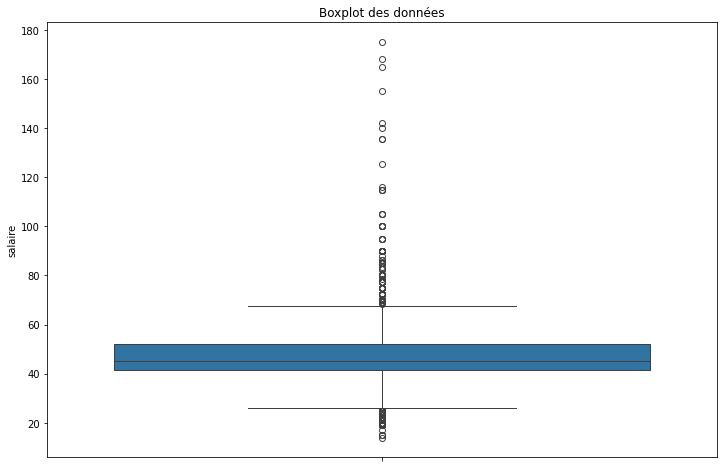

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=df_filtred["salaire"])

plt.title("Boxplot des données")

ax.tick_params(axis='x', labelrotation=45)

plt.show()

In [16]:
# Calculer Q1 et Q3
data = df_filtred['salaire']
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1

lower_bound_salaire = Q1 - 1.5 * IQR
upper_bound_salaire = Q3 + 1.5 * IQR

outliers_salaire = (df_filtred['salaire'] < lower_bound_salaire) | (df_filtred['salaire'] > upper_bound_salaire)

df_merged_without_outliers = df_filtred[~outliers_salaire]

(df_merged_without_outliers)

,entreprise,metier,departement,salaire,experience,type_contrat,zone_de_deplacement,statut_du_poste,Teletravail
0,MICHAEL PAGE INTERNATIONAL FRANCE,Développeur,Bouches-du-Rhône,40.00000,0,CDI,Pas de déplacement,Cadre du secteur privé,non spécifié
1,Charlotte Drahy sas,Développeur,Bouches-du-Rhône,40.00000,5,CDI,Nationale,Cadre du secteur privé,Partiel possible
2,LOEMA,Développeur,Bouches-du-Rhône,47.50000,4,CDI,Pas de déplacement,Cadre du secteur privé,Ponctuel autorisé
3,CELAD,Développeur,Bouches-du-Rhône,36.00000,1,CDI,Pas de déplacement,Cadre du secteur privé,non spécifié
4,EASY PARTNER,Développeur,Bouches-du-Rhône,40.00000,3,CDI,Pas de déplacement,Cadre du secteur privé,Total possible
...,...,...,...,...,...,...,...,...,...
8036,Groupe ECOCERT,Data analyst,Gers,46.20672,4,CDI,Régionale,Cadre du secteur privé,Partiel possible
8037,Seyos,Business developer,Lot-et-Garonne,52.50000,5,CDI,Pas de déplacement,Cadre du secteur privé,Partiel possible
8038,LES COLETTES,Ingénieur test et recettes,Lot-et-Garonne,52.50000,2,CDI,Pas de déplacement,Cadre du secteur privé,non spécifié
8039,Armée de l'Air et de l'Espace,Consultant en cybersécurité,Haute-Marne,34.00000,0,CDD,Nationale,Cadre du secteur public / Armées,non spécifié


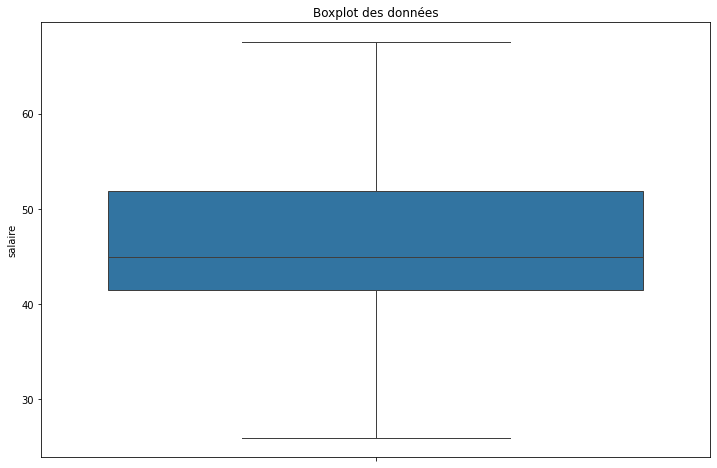

In [17]:

plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=df_merged_without_outliers["salaire"])

plt.title("Boxplot des données")

ax.tick_params(axis='x', labelrotation=45)

plt.show()

# Prédiction des categorie de salaire : 

## Discrétisation de la variable salaire en 2 sous catégories (binaire) : 

In [18]:

df_merged_without_outliers['salaire_bin'] = pd.cut(df_merged_without_outliers['salaire'], bins=2, labels=["Bas", "Haut"])
df_merged_without_outliers

<ipython-input-18-b86ad3597d11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_without_outliers['salaire_bin'] = pd.cut(df_merged_without_outliers['salaire'], bins=2, labels=["Bas", "Haut"])


,entreprise,metier,departement,salaire,experience,type_contrat,zone_de_deplacement,statut_du_poste,Teletravail,salaire_bin
0,MICHAEL PAGE INTERNATIONAL FRANCE,Développeur,Bouches-du-Rhône,40.00000,0,CDI,Pas de déplacement,Cadre du secteur privé,non spécifié,Bas
1,Charlotte Drahy sas,Développeur,Bouches-du-Rhône,40.00000,5,CDI,Nationale,Cadre du secteur privé,Partiel possible,Bas
2,LOEMA,Développeur,Bouches-du-Rhône,47.50000,4,CDI,Pas de déplacement,Cadre du secteur privé,Ponctuel autorisé,Haut
3,CELAD,Développeur,Bouches-du-Rhône,36.00000,1,CDI,Pas de déplacement,Cadre du secteur privé,non spécifié,Bas
4,EASY PARTNER,Développeur,Bouches-du-Rhône,40.00000,3,CDI,Pas de déplacement,Cadre du secteur privé,Total possible,Bas
...,...,...,...,...,...,...,...,...,...,...
8036,Groupe ECOCERT,Data analyst,Gers,46.20672,4,CDI,Régionale,Cadre du secteur privé,Partiel possible,Bas
8037,Seyos,Business developer,Lot-et-Garonne,52.50000,5,CDI,Pas de déplacement,Cadre du secteur privé,Partiel possible,Haut
8038,LES COLETTES,Ingénieur test et recettes,Lot-et-Garonne,52.50000,2,CDI,Pas de déplacement,Cadre du secteur privé,non spécifié,Haut
8039,Armée de l'Air et de l'Espace,Consultant en cybersécurité,Haute-Marne,34.00000,0,CDD,Nationale,Cadre du secteur public / Armées,non spécifié,Bas


In [19]:
category_counts = df_merged_without_outliers['salaire_bin'].value_counts().reset_index()
category_counts.columns = ['salaire', 'nombre']
category_counts

,salaire,nombre
0,Bas,4559
1,Haut,3175


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  # Transformation des variables catégorielles
label_encoders = {}
for column in ['entreprise', 'metier', 'departement', 'type_contrat', 'zone_de_deplacement', 'statut_du_poste', 'Teletravail','salaire_bin']:
    le = LabelEncoder()
    df_merged_without_outliers[column] = le.fit_transform(df_merged_without_outliers[column])
    label_encoders[column] = le


<ipython-input-20-4283b4248a56>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_without_outliers[column] = le.fit_transform(df_merged_without_outliers[column])
<ipython-input-20-4283b4248a56>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_without_outliers[column] = le.fit_transform(df_merged_without_outliers[column])
<ipython-input-20-4283b4248a56>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [21]:
df_merged_without_outliers

,entreprise,metier,departement,salaire,experience,type_contrat,zone_de_deplacement,statut_du_poste,Teletravail,salaire_bin
0,1319,28,11,40.00000,0,2,3,1,4,0
1,547,28,11,40.00000,5,2,2,1,1,0
2,1229,28,11,47.50000,4,2,3,1,2,1
3,412,28,11,36.00000,1,2,3,1,4,0
4,662,28,11,40.00000,3,2,3,1,3,0
...,...,...,...,...,...,...,...,...,...,...
8036,939,23,31,46.20672,4,2,4,1,1,0
8037,1838,11,57,52.50000,5,2,3,1,1,1
8038,1203,45,57,52.50000,2,2,3,1,4,1
8039,260,21,37,34.00000,0,1,2,2,4,0


In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

/home/djeghali/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
155/155 [==============================] - 5s 18ms/step - loss: 0.5157 - accuracy: 0.7468 - val_loss: 0.3789 - val_accuracy: 0.8376
Epoch 2/50
155/155 [==============================] - 3s 16ms/step - loss: 0.3361 - accuracy: 0.8662 - val_loss: 0.3529 - val_accuracy: 0.8554
Epoch 3/50
155/155 [==============================] - 2s 15ms/step - loss: 0.2633 - accuracy: 0.8967 - val_loss: 0.3499 - val_accuracy: 0.8603
Epoch 4/50
155/155 [==============================] - 2s 14ms/step - loss: 0.1997 - accuracy: 0.9222 - val_loss: 0.3521 - val_accuracy: 0.8651
Epoch 5/50
155/155 [==============================] - 2s 15ms/step - loss: 0.1567 - accuracy: 0.9432 - val_loss: 0.3820 - val_accuracy: 0.8586
Epoch 6/50
155/155 [==============================] - 2s 15ms/step - loss: 0.1241 - accuracy: 0.9566 - val_loss: 0.3993 - val_accuracy: 0.8635
Epoch 7/50
155/155 [==============================] - 2s 15ms/step - loss: 0.0930 - accuracy: 0.9689 - val_loss: 0.4398 - val_accuracy: 0.8554

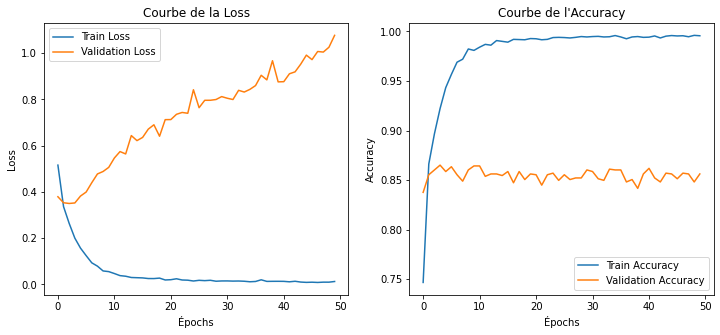

In [ ]:



X = df_merged_without_outliers.drop(columns=['salaire_bin','salaire'])
y = df_merged_without_outliers['salaire_bin']

encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Courbe de la Loss')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Courbe de l\'Accuracy')
plt.xlabel('Épochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
#

/home/djeghali/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/100
184/184 [==============================] - 5s 14ms/step - loss: 0.4861 - accuracy: 0.7697 - val_loss: 0.4229 - val_accuracy: 0.8329
Epoch 2/100
184/184 [==============================] - 2s 11ms/step - loss: 0.3301 - accuracy: 0.8640 - val_loss: 0.3298 - val_accuracy: 0.8682
Epoch 3/100
184/184 [==============================] - 2s 13ms/step - loss: 0.2532 - accuracy: 0.9006 - val_loss: 0.2575 - val_accuracy: 0.8988
Epoch 4/100
184/184 [==============================] - 4s 21ms/step - loss: 0.1919 - accuracy: 0.9245 - val_loss: 0.1898 - val_accuracy: 0.9321
Epoch 5/100
184/184 [==============================] - 3s 18ms/step - loss: 0.1476 - accuracy: 0.9483 - val_loss: 0.1503 - val_accuracy: 0.9477
Epoch 6/100
184/184 [==============================] - 3s 16ms/step - loss: 0.1086 - accuracy: 0.9609 - val_loss: 0.2069 - val_accuracy: 0.9219
Epoch 7/100
184/184 [==============================] - 2s 11ms/step - loss: 0.0875 - accuracy: 0.9682 - val_loss: 0.1245 - val_accuracy:

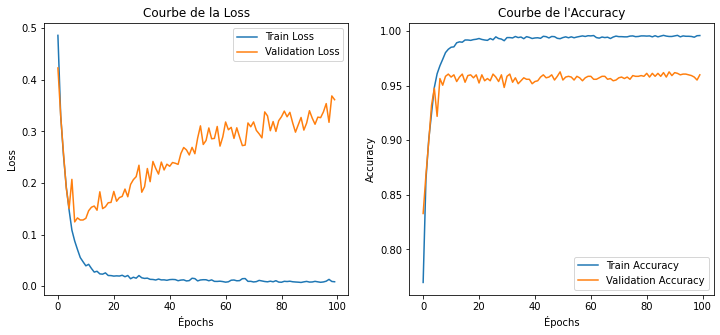

In [25]:
from imblearn.over_sampling import RandomOverSampler

X = df_merged_without_outliers.drop(columns=['salaire_bin','salaire'])
y = df_merged_without_outliers['salaire_bin']

encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

oversampler = RandomOverSampler(random_state=42)
        
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_resampled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_resampled, y_resampled, epochs=100, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Courbe de la Loss')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Courbe de l\'Accuracy')
plt.xlabel('Épochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
#

/home/djeghali/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
2942/2942 [==============================] - 29s 9ms/step - loss: 0.4264 - accuracy: 0.8120 - val_loss: 0.3892 - val_accuracy: 0.8485
Epoch 2/10
2942/2942 [==============================] - 24s 8ms/step - loss: 0.3023 - accuracy: 0.8773 - val_loss: 0.2568 - val_accuracy: 0.8906
Epoch 3/10
2942/2942 [==============================] - 19s 6ms/step - loss: 0.2227 - accuracy: 0.9072 - val_loss: 0.2019 - val_accuracy: 0.9273
Epoch 4/10
2942/2942 [==============================] - 19s 7ms/step - loss: 0.1648 - accuracy: 0.9342 - val_loss: 0.2464 - val_accuracy: 0.9069
Epoch 5/10
2942/2942 [==============================] - 26s 9ms/step - loss: 0.1298 - accuracy: 0.9487 - val_loss: 0.1524 - val_accuracy: 0.9395
Epoch 6/10
2942/2942 [==============================] - 28s 10ms/step - loss: 0.0997 - accuracy: 0.9631 - val_loss: 0.1531 - val_accuracy: 0.9355
Epoch 7/10
2942/2942 [==============================] - 20s 7ms/step - loss: 0.0761 - accuracy: 0.9663 - val_loss: 0.1624 - val_a

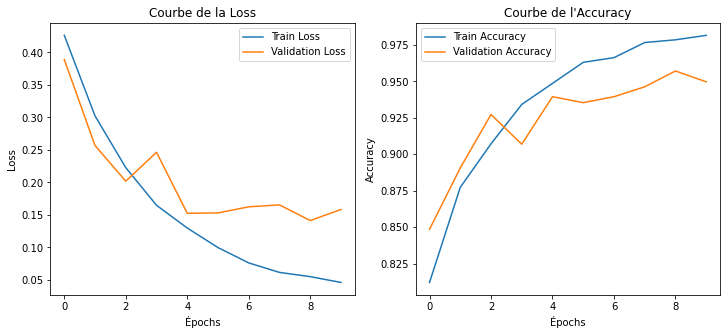

In [26]:
from imblearn.over_sampling import RandomOverSampler

X = df_merged_without_outliers.drop(columns=['salaire_bin','salaire'])
y = df_merged_without_outliers['salaire_bin']

encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

oversampler = RandomOverSampler(random_state=42)
        
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_resampled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_resampled, y_resampled, epochs=10, batch_size=2, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Courbe de la Loss')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Courbe de l\'Accuracy')
plt.xlabel('Épochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
#

## Discrétisation de la variable salaire en 3 sous catégories : 

In [49]:

df_merged_without_outliers['salaire'] = pd.cut(df_merged_without_outliers['salaire'], bins=3, labels=["Bas", "Moyen", "Haut"])
df_merged_without_outliers

<ipython-input-49-b559041f2ec8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_without_outliers['salaire'] = pd.cut(df_merged_without_outliers['salaire'], bins=3, labels=["Bas", "Moyen", "Haut"])


,entreprise,metier,departement,salaire,experience,type_contrat,zone_de_deplacement,statut_du_poste,Teletravail
0,MICHAEL PAGE INTERNATIONAL FRANCE,Développeur,Bouches-du-Rhône,Moyen,0,CDI,Pas de déplacement,Cadre du secteur privé,non spécifié
1,Charlotte Drahy sas,Développeur,Bouches-du-Rhône,Moyen,5,CDI,Nationale,Cadre du secteur privé,Partiel possible
2,LOEMA,Développeur,Bouches-du-Rhône,Moyen,4,CDI,Pas de déplacement,Cadre du secteur privé,Ponctuel autorisé
3,CELAD,Développeur,Bouches-du-Rhône,Bas,1,CDI,Pas de déplacement,Cadre du secteur privé,non spécifié
4,EASY PARTNER,Développeur,Bouches-du-Rhône,Moyen,3,CDI,Pas de déplacement,Cadre du secteur privé,Total possible
...,...,...,...,...,...,...,...,...,...
8036,Groupe ECOCERT,Data analyst,Gers,Moyen,4,CDI,Régionale,Cadre du secteur privé,Partiel possible
8037,Seyos,Business developer,Lot-et-Garonne,Moyen,5,CDI,Pas de déplacement,Cadre du secteur privé,Partiel possible
8038,LES COLETTES,Ingénieur test et recettes,Lot-et-Garonne,Moyen,2,CDI,Pas de déplacement,Cadre du secteur privé,non spécifié
8039,Armée de l'Air et de l'Espace,Consultant en cybersécurité,Haute-Marne,Bas,0,CDD,Nationale,Cadre du secteur public / Armées,non spécifié


In [50]:
category_counts = df_merged_without_outliers['salaire'].value_counts().reset_index()
category_counts.columns = ['salaire', 'nombre']
category_counts

,salaire,nombre
0,Moyen,5927
1,Bas,1148
2,Haut,659


### Application de quelques modèles pour effectuer une prédiction de salaires : 

In [51]:
df_merged_without_outliers.columns

Index(['entreprise', 'metier', 'departement', 'salaire', 'experience',
       'type_contrat', 'zone_de_deplacement', 'statut_du_poste',
       'Teletravail'],
      dtype='object')

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  


In [54]:
# Transformation des variables catégorielles
label_encoders = {}
for column in ['entreprise', 'metier', 'departement', 'type_contrat', 'zone_de_deplacement', 'statut_du_poste', 'Teletravail','salaire']:
    le = LabelEncoder()
    df_merged_without_outliers[column] = le.fit_transform(df_merged_without_outliers[column])
    label_encoders[column] = le

<ipython-input-54-cdff1b631a88>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_without_outliers[column] = le.fit_transform(df_merged_without_outliers[column])
<ipython-input-54-cdff1b631a88>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_without_outliers[column] = le.fit_transform(df_merged_without_outliers[column])
<ipython-input-54-cdff1b631a88>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

### Séparation en train et en test : 

In [80]:
X = df_merged_without_outliers.drop(['salaire'], axis=1)
y = df_merged_without_outliers['salaire']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Lancement de quelques modèles :

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialiser les modèles
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()

# Entraîner les modèles
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Prédire les ensembles de test
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)


### Première évaluation :

In [59]:
# Évaluer les performances des modèles
print("Decision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("K-Nearest Neighbors Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


Decision Tree Classifier
Accuracy: 0.7268418785006463
              precision    recall  f1-score   support

           0       0.44      0.43      0.43       354
           1       0.40      0.40      0.40       220
           2       0.83      0.83      0.83      1747

    accuracy                           0.73      2321
   macro avg       0.55      0.55      0.55      2321
weighted avg       0.73      0.73      0.73      2321

Random Forest Classifier
Accuracy: 0.8013787160706592
              precision    recall  f1-score   support

           0       0.72      0.30      0.43       354
           1       0.71      0.32      0.44       220
           2       0.81      0.96      0.88      1747

    accuracy                           0.80      2321
   macro avg       0.75      0.53      0.58      2321
weighted avg       0.79      0.80      0.77      2321

K-Nearest Neighbors Classifier
Accuracy: 0.7479534683326152
              precision    recall  f1-score   support

           0   

### Visualisation des résultats : 

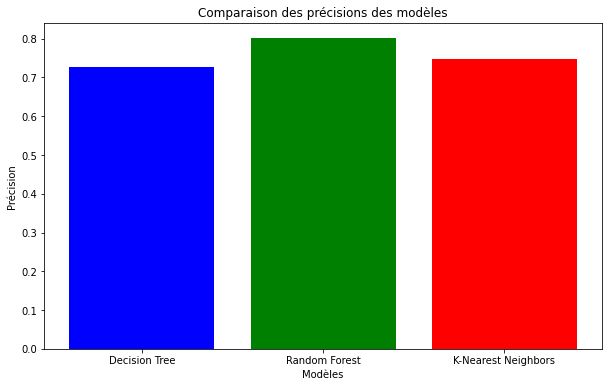

In [60]:
import matplotlib.pyplot as plt

# Précisions des modèles
models = ['Decision Tree', 'Random Forest', 'K-Nearest Neighbors']
accuracies = [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_knn)]

# Visualiser les précisions
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Modèles')
plt.ylabel('Précision')
plt.title('Comparaison des précisions des modèles')
plt.show()


### D'autres modèles : 

#### Définition des métriques : 

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def scorer(pred, actual):
    accuracy = accuracy_score(actual, pred)
    precision = precision_score(actual, pred, average='weighted')
    recall = recall_score(actual, pred, average='weighted')
    f1 = f1_score(actual, pred, average='weighted')
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}


#### Validation croisée :

In [97]:
from sklearn.model_selection import KFold

def kfold(data, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(data):
        print("hhhhhh")
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]
        yield train_data, test_data
kfold(X)

<generator object kfold at 0x7f78e9ac30b0>

#### Application des modèles :

In [91]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import ttest_ind
import numpy as np
import itertools

# Définition des métriques
def scorer(pred, actual):
    accuracy = accuracy_score(actual, pred)
    precision = precision_score(actual, pred, average='weighted')
    recall = recall_score(actual, pred, average='weighted')
    f1 = f1_score(actual, pred, average='weighted')
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

# Validation croisée
def kfold(data, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(data):
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]
        yield train_data, test_data

# Application des modèles
def protocol_pipeline(data, model, n_splits=5):
    metrics_per_fold = []

    for train_data, test_data in kfold(data, n_splits):
        X_train = train_data.drop(columns=['salaire'])
        y_train = train_data['salaire']
        X_test = test_data.drop(columns=['salaire'])
        y_test = test_data['salaire']

  
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        metrics = scorer(y_pred, y_test)
        metrics_per_fold.append(metrics)

    return metrics_per_fold

# Définition des modèles
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Neural Network': MLPClassifier(max_iter=300)
}

# Exécution du protocole
results = {}
for model_name, model in models.items():
    results[model_name] = protocol_pipeline(df_merged_without_outliers, model)

# Analyse des résultats
def analyze_results(results):
    average_metrics = {}
    for model_name, metrics in results.items():
        avg_metrics = {
            'accuracy': np.mean([m['accuracy'] for m in metrics]),
            'precision': np.mean([m['precision'] for m in metrics]),
            'recall': np.mean([m['recall'] for m in metrics]),
            'f1': np.mean([m['f1'] for m in metrics])
        }
        average_metrics[model_name] = avg_metrics
    return average_metrics

average_metrics = analyze_results(results)

model_names = list(models.keys())
comparisons = list(itertools.combinations(model_names, 2))

for model1, model2 in comparisons:
    for metric in ['accuracy', 'precision', 'recall', 'f1']:
        metric1 = [m[metric] for m in results[model1]]
        metric2 = [m[metric] for m in results[model2]]
        t_stat, p_value = ttest_ind(metric1, metric2)
        print(f"Comparison between {model1} and {model2} for {metric}: t-stat={t_stat:.3f}, p-value={p_value:.3f}")

# Affichage des résultats
for model_name, metrics in average_metrics.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.3f}")


/home/djeghali/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/djeghali/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Comparison between Decision Tree and Random Forest for accuracy: t-stat=-27.205, p-value=0.000
Comparison between Decision Tree and Random Forest for precision: t-stat=-11.641, p-value=0.000
Comparison between Decision Tree and Random Forest for recall: t-stat=-27.205, p-value=0.000
Comparison between Decision Tree and Random Forest for f1: t-stat=-12.297, p-value=0.000
Comparison between Decision Tree and Gradient Boosting for accuracy: t-stat=-23.932, p-value=0.000
Comparison between Decision Tree and Gradient Boosting for precision: t-stat=-6.647, p-value=0.000
Comparison between Decision Tree and Gradient Boosting for recall: t-stat=-23.932, p-value=0.000
Comparison between Decision Tree and Gradient Boosting for f1: t-stat=2.051, p-value=0.074
Comparison between Decision Tree and Neural Network for accuracy: t-stat=0.624, p-value=0.550
Comparison between Decision Tree and Neural Network for precision: t-stat=1.577, p-value=0.153
Comparison between Decision Tree and Neural Network 

In [95]:
from imblearn.over_sampling import RandomOverSampler

def protocol_pipeline_oversample(data, model, n_splits=5):
    metrics_per_fold = []

    for train_data, test_data in kfold(data, n_splits):
        X_train = train_data.drop(columns=['salaire'])
        y_train = train_data['salaire']
        X_test = test_data.drop(columns=['salaire'])
        y_test = test_data['salaire']
        oversampler = RandomOverSampler(random_state=42)
        
        X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

        model.fit(X_resampled, y_resampled)
        y_pred = model.predict(X_test)
        metrics = scorer(y_pred, y_test)
        metrics_per_fold.append(metrics)

    return metrics_per_fold

# Exécution du protocole
results_sampled = {}
for model_name, model in models.items():
    results_sampled[model_name] = protocol_pipeline_oversample(df_merged_without_outliers, model)

average_metrics = analyze_results(results_sampled)

model_names = list(models.keys())
comparisons = list(itertools.combinations(model_names, 2))

for model1, model2 in comparisons:
    for metric in ['accuracy', 'precision', 'recall', 'f1']:
        metric1 = [m[metric] for m in results_sampled[model1]]
        metric2 = [m[metric] for m in results_sampled[model2]]
        t_stat, p_value = ttest_ind(metric1, metric2)
        print(f"Comparison between {model1} and {model2} for {metric}: t-stat={t_stat:.3f}, p-value={p_value:.3f}")

# Affichage des résultats
for model_name, metrics in average_metrics.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.3f}")

Comparison between Decision Tree and Random Forest for accuracy: t-stat=-9.100, p-value=0.000
Comparison between Decision Tree and Random Forest for precision: t-stat=-5.564, p-value=0.001
Comparison between Decision Tree and Random Forest for recall: t-stat=-9.100, p-value=0.000
Comparison between Decision Tree and Random Forest for f1: t-stat=-7.016, p-value=0.000
Comparison between Decision Tree and Gradient Boosting for accuracy: t-stat=19.111, p-value=0.000
Comparison between Decision Tree and Gradient Boosting for precision: t-stat=-2.866, p-value=0.021
Comparison between Decision Tree and Gradient Boosting for recall: t-stat=19.111, p-value=0.000
Comparison between Decision Tree and Gradient Boosting for f1: t-stat=16.296, p-value=0.000
Comparison between Decision Tree and Neural Network for accuracy: t-stat=23.619, p-value=0.000
Comparison between Decision Tree and Neural Network for precision: t-stat=4.179, p-value=0.003
Comparison between Decision Tree and Neural Network for 

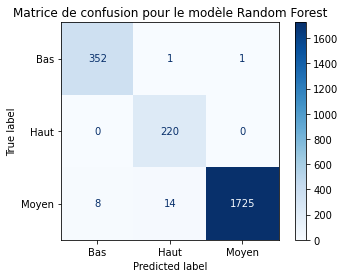

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

best_model_name = max(average_metrics, key=lambda k: average_metrics[k]['f1'])
best_model = models[best_model_name]


y_pred = best_model.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders['salaire'].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Matrice de confusion pour le modèle {best_model_name}")
plt.show()


#### Optimisation des hyperparametres : 

In [94]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(RandomOverSampler(), RandomForestClassifier())

param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],
    'randomforestclassifier__class_weight': ['balanced', 'balanced_subsample']
}

grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_weighted', cv=5)
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres:", grid_search.best_params_)

print("Meilleure performance (F1 weighted):", grid_search.best_score_)
"""
Meilleurs paramètres: {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 200}
Meilleure performance (F1 weighted): 0.761249972099207"""

Meilleurs paramètres: {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 200}
Meilleure performance (F1 weighted): 0.761249972099207
